In [1]:
import numpy as np 
import pandas as pd
# import os, zipfile
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
from glob import glob
from PIL import Image

In [12]:
# sorted(glob('./test_data/*'))

In [11]:
train_df = pd.read_csv('./train_onelabel.csv')
train_images_paths = ['./train_images/' + p for p in train_df.image]
train_labels = train_df['class'].values
# test_images_paths = sorted(glob(path to the test data))

# Prepare Dataset

In [26]:
from keras.preprocessing.image import load_img, img_to_array
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [17]:
train_images = (load_img(p, target_size=(32, 32)) for p in train_images_paths)
train_images = [img_to_array(img)[:, :, [0]] for img in train_images]
train_images = np.array(train_images)
train_images.shape

(24204, 32, 32, 1)

In [27]:
train_labels = to_categorical(train_labels)

In [28]:
x_train, x_val, y_train,  y_val = train_test_split(train_images, train_labels, test_size=0.2)

# CNN Example

In [20]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [21]:
# Initialising the CNN
classifier = Sequential()

In [22]:
# Step 1 - Convolution ---TODO: see input specification
#input_shape=(1, 128, 128)
#padding='valid'
classifier.add(Conv2D(32, (3, 3), input_shape = (32,32,1),padding='same', activation = 'relu'))

In [23]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [24]:
# Adding a second convolutional layer+pooling layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding='same'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [25]:
# Step 3 - Flattening
classifier.add(Flatten())

In [29]:
#Step 4 - Create a fully connected neural network
'''its good practise to pick a number of power of two-experimenting output_dim
128 hidden nodes in hidden layers-by experimenting'''
 

#output_dim = number of nodes in the hidden layer
classifier.add(Dense(units = 128, activation = 'relu'))

#Dropout
classifier.add(Dropout(rate = 0.1))

#second hidden layer
classifier.add(Dense(units = 128, activation = 'relu'))

#Dropout
classifier.add(Dropout(rate = 0.2))

#output layer
classifier.add(Dense(units = 121, activation = 'softmax')) #We have 121 categories of plankton!!


In [30]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training Model

In [31]:
from keras.preprocessing.image import ImageDataGenerator

In [33]:
batch_size = 32
generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
flow = generator.flow(x_train, y_train, batch_size=batch_size)

In [36]:
# Part 2 - Fitting the CNN to the images
# from keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)



# training_set = train_datagen.flow_from_directory('train_data',
#                                                  target_size = (32, 32),
#                                                  batch_size = 32,
#                                                  class_mode = 'binary',
#                                                  color_mode = 'grayscale')

# test_set = test_datagen.flow_from_directory('test_data',
#                                             target_size = (32, 32),
#                                             batch_size = 32,
#                                             class_mode = 'binary',
#                                             color_mode = 'grayscale')


# you have to change steps_per_epoch = (8000/32) and validation_steps = (2000/32)
history = classifier.fit_generator(flow,
                         steps_per_epoch = (len(x_train[::10])/ batch_size),
                         epochs = 2,
                         validation_data =[x_val[::10], y_val[::10]])

Epoch 1/2
606/60 [============================================================================================================================================================================================================================================================================================================] - 84s 139ms/step - loss: 2.4524 - acc: 0.3506 - val_loss: 2.1084 - val_acc: 0.4392
Epoch 2/2
606/60 [============================================================================================================================================================================================================================================================================================================] - 74s 121ms/step - loss: 2.2627 - acc: 0.3871 - val_loss: 2.0273 - val_acc: 0.4577


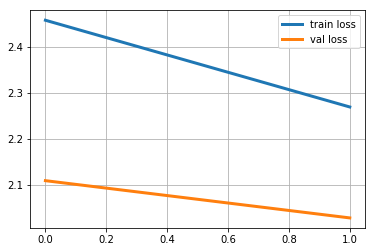

In [39]:
plt.plot(history.history['loss'], label='train loss', lw=3)
plt.plot(history.history['val_loss'], label='val loss', lw=3)
plt.grid()
plt.legend(loc=0)
plt.show()

# Save Model

In [96]:
# from keras.models import model_from_json

# # serialize model to JSON
# best_model_classification_json = classifier.to_json()
# with open("best_model_3.json", "w") as json_file:
#     json_file.write(best_model_classification_json)
# # serialize weights to HDF5
# classifier.save_weights("model_best.h5")
# print("Saved model to disk")

Saved model to disk


# Load Model

In [ ]:
from keras.models import model_from_json

# load json and create model
json_file = open('best_model_3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
classifier = model_from_json(loaded_model_json)
# load weights into new model
classifier.load_weights("model_best.h5")
print("Loaded model from disk")

# Make predictions

In [90]:
import numpy as np
from keras.preprocessing import image


test_image = image.load_img('single_prediction/7684.jpg', target_size = (32, 32),grayscale = True)
test_image = image.img_to_array(test_image)
print(type(test_image))
print(test_image.shape)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
#result = classifier.predict(test_image)
training_set.class_indices
print(result)


<class 'numpy.ndarray'>
(32, 32, 1)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [95]:
int(np.where(result[0]>=1)[0][0])

92

In [113]:
import os
from collections import OrderedDict

def find_category(path):
    
    test_image = image.load_img(path, target_size = (32, 32),grayscale = True)
    test_image = image.img_to_array(test_image)
  
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    
    training_set.class_indices
    
    
    category = int(np.where(result[0]!=0)[0][0])
    return category
    

images = []
categories = []
path = 'test_images/'

for count,i in enumerate(os.listdir(path)):
    
    images.append(str(i)) #save image name
    
    image_path = path+str(i)

    category = find_category(image_path)
    
    categories.append(category) #saves the category of the image
    

#Create Final csv for the competition
csv_list =  pd.DataFrame( OrderedDict( { 'image': pd.Series(images), 'class': pd.Series(categories) } ) )
csv_list.to_csv('sample.csv',index=False)
    


ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
o

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
o

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
o

In [120]:
from collections import OrderedDict


csv_list =  pd.DataFrame( OrderedDict( { 'image': pd.Series(images), 'class': pd.Series(categories) } ) )
# csv_list = pd.DataFrame(
#     {'image': images,
#      'class': categories   
#     })

#csv_list.to_csv('sample.csv')

In [121]:
csv_list.head()

,image,class
0,117290.jpg,51
1,35538.jpg,120
2,142883.jpg,51
3,146364.jpg,82
4,97807.jpg,82


In [123]:
csv_list.to_csv('sample.csv',index=False)